<a href="https://colab.research.google.com/github/pm6022/labnotebooks/blob/main/co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lammps Download and First Simulation run ($\rho=\frac{2,7Kg}{m^{3}}$)

In [2]:
!apt-get install lammps

Reading package lists... Done
Building dependency tree       
Reading state information... Done
lammps is already the newest version (0~20161109.git9806da6-7).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [3]:
!mpirun --allow-run-as-root -np 2 lammps -in CO2_in.LJ_3D_NVT

Output streaming troncato alle ultime 5000 righe.
19548100 90564767.9229993
19548200 90565171.4305763
19548300 90565574.7219562
19548400 90565973.3777104
19548500 90566366.6390809
19548600 90566760.9438153
19548700 90567155.6674992
19548800 90567549.1590931
19548900 90567944.3735423
19549000 90568338.8593536
19549000 -5.13674842562944 882.605162200555 887.741910626184 296.392133692453 1.48933414622205 27000000
19549100 90568733.7044482
19549200 90569132.4331304
19549300 90569531.8122403
19549400 90569929.6537542
19549500 90570326.4712082
19549600 90570721.8277972
19549700 90571124.6808531
19549800 90571541.6673449
19549900 90571962.3456151
19550000 90572384.4955587
19550000 -5.4424172840327 902.672761669466 908.115178953499 303.131136453151 1.5282223158688 27000000
19550100 90572811.6345553
19550200 90573237.6388057
19550300 90573663.179411
19550400 90574085.8667672
19550500 90574508.1717552
19550600 90574933.1918023
19550700 90575359.2538961
19550800 90575785.8606948
19550900 90576212

# Data manipulation ($\rho=\frac{2,7Kg}{m^{3}}$)

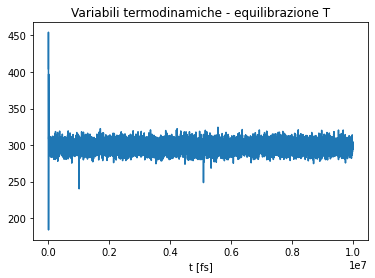

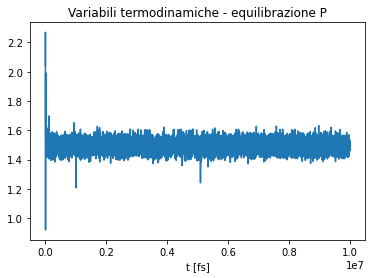

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


THERMO_file = np.genfromtxt('thermodynamics_equilibration_300.dat',  delimiter=" ")
time = THERMO_file[:, 0]

T = THERMO_file[:, 4]
P = THERMO_file[:, 5]
V = THERMO_file[:, 6]
plt.figure(1)
plt.title("Variabili termodinamiche - equilibrazione T")
plt.xlabel("t [fs]")
plt.plot(time, T)

plt.figure(2)
plt.title("Variabili termodinamiche - equilibrazione P")
plt.xlabel("t [fs]")
plt.plot(time, P)

plt.show()

[[1.3266491e-09]]


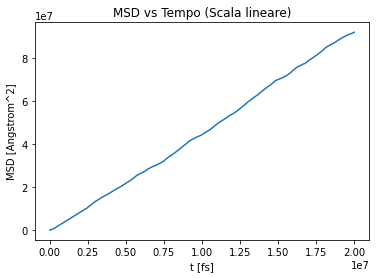

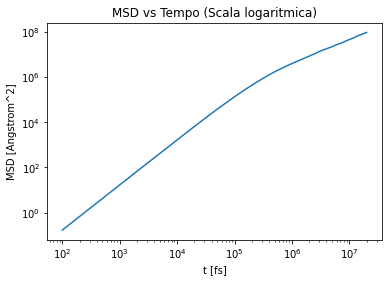

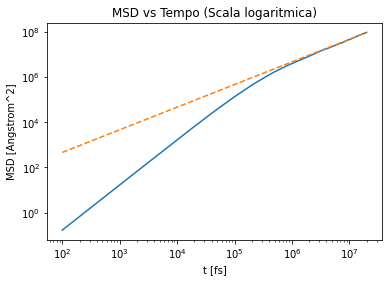

In [9]:
MSD_file = np.genfromtxt('msd_300.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D):
  return 6*D*t

D, err = curve_fit(linea_retta,time,msd)

plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")